## Reading one of the grib files and dumping a modified version of it
## Remember to do this export ECCODES_DEFINITION_PATH=/home/cap/libs/grib_definitions_dmi:$ECCODES_DEFINITION_PATH
## before loading the data so it finds the correct definitions for DMI



In [4]:
import xarray as xr
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import os

In [9]:
# Tried updating variable below but did now work
# the same as when I load the paths before starting the notebook
# (ie, the variable is not listed as tp but as unknown)
#import os

# Get the current value of ECCODES_DEFINITION_PATH, if any
#current_path = os.environ.get('ECCODES_DEFINITION_PATH', '')

# Prepend your custom path
#new_path = '/home/cap/libs/grib_definitions_dmi'
#if current_path:
#    new_path = f'{new_path}:{current_path}'

# Set the environment variable
#os.environ['ECCODES_DEFINITION_PATH'] = new_path

In [10]:
os.environ["ECCODES_DEFINITION_PATH"]

'/home/cap/libs/grib_definitions_dmi:/usr/share/eccodes/samples'

In [11]:
ifile = "/media/cap/extra_work/verification/oper-harp-verif/ACCORD_VS_202507/sample_data/NEA/NEA19082700/tp_NEA1908270903.grib"

df=xr.open_dataset(ifile,engine="cfgrib") #3 hour accumu for forecast starting at 09 UTC


Ignoring index file '/media/cap/extra_work/verification/oper-harp-verif/ACCORD_VS_202507/sample_data/NEA/NEA19082700/tp_NEA1908270903.grib.5b7b6.idx' incompatible with GRIB file


In [12]:
df

<xarray.Dataset> Size: 25MB
Dimensions:            (y: 1069, x: 1189)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    heightAboveGround  float64 8B ...
    latitude           (y, x) float64 10MB ...
    longitude          (y, x) float64 10MB ...
    valid_time         datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Data variables:
    tp                 (y, x) float32 5MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ekmi
    GRIB_centreDescription:  Copenhagen
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Copenhagen
    history:                 2025-07-22T10:54 GRIB to CDM+CF via cfgrib-0.9.1...

In [17]:
#df["tp"].plot()

tp = df["tp"]
lats = df['latitude']
lons = df['longitude']


max_value = tp.max().values
max_idx = np.unravel_index(tp.argmax(), tp.shape)
max_lat = lats.values[max_idx]  # This will correctly index the 2D array
max_lon = lons.values[max_idx]  # This will correctly index the 2D array
max_lat

np.float64(64.013424)

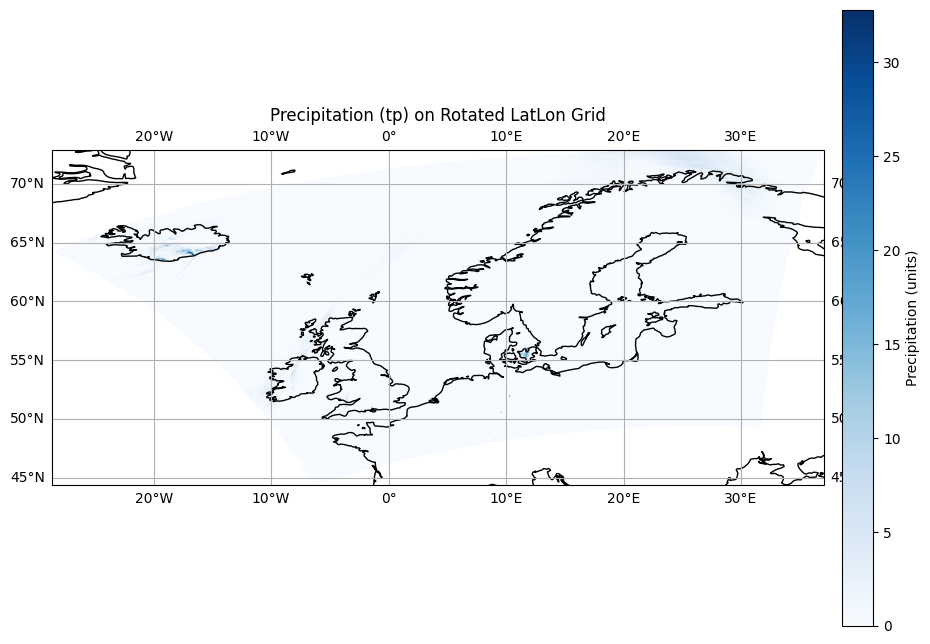

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Your dataset and variable
# df: xarray.Dataset
# tp: xarray.DataArray with dims (y, x)
tp = df['tp']
lats = df['latitude']
lons = df['longitude']

# Create a PlateCarree projection for the map (standard lat/lon)
pc = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': pc})

# Plot using pcolormesh with 2D lat/lon coordinates
# Specify transform=pc because lats/lons are in PlateCarree (regular lat/lon)
im = ax.pcolormesh(
    lons, lats, tp,
    transform=pc,
    cmap='Blues',
    shading='auto'
)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)
# Set the extent to zoom in on a specific region
# Format: [lon_min, lon_max, lat_min, lat_max]
#lon_min = 10
#lon_max = 12
#lat_min = 55
#lat_max = 57
#ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=pc)
# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, label='Precipitation (units)')



plt.title('Precipitation (tp) on Rotated LatLon Grid')
plt.show()

In [19]:
# Find the maximum value and its location
#max_value = tp.max().values
#max_idx = np.unravel_index(tp.argmax(), tp.shape)
#max_lat = lats.values[max_idx[0]]
#max_lon = lons.values[max_idx[1]]



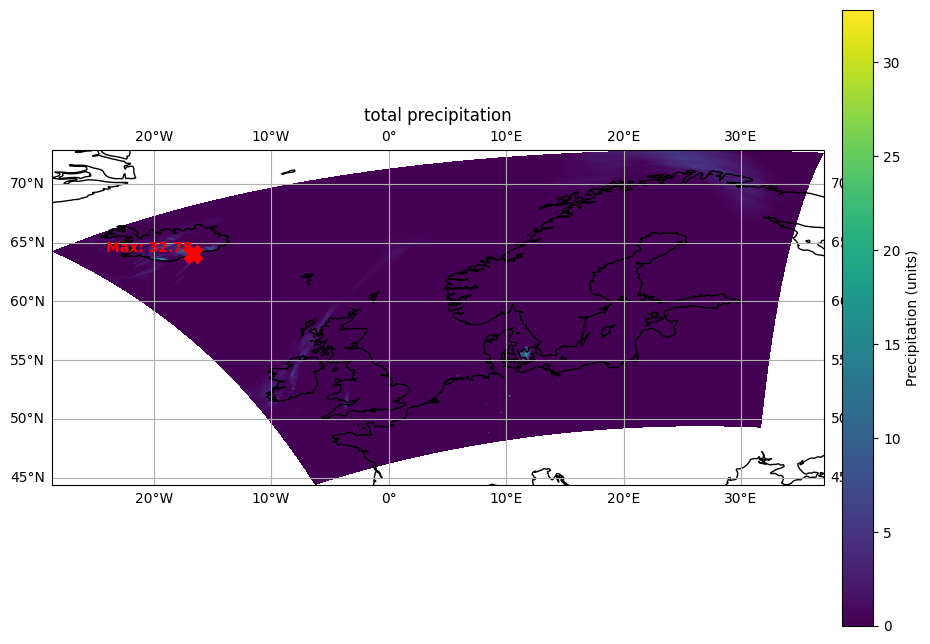

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs

# Define a custom blue color scale similar to the image
colors = [
    '#e0f3f8',  # very light blue
    '#a9d6e5',
    '#74b9d8',
    '#3b8ec2',
    '#1a5e8a',  # deep blue
    '#0b3d66'
]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue', colors, N=256)
cmap = "viridis"
# Your dataset and variable
tp = df['tp']
lats = df['latitude']
lons = df['longitude']

pc = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': pc})

im = ax.pcolormesh(
    lons, lats, tp,
    transform=pc,
    cmap=cmap,
    shading='auto'
)

ax.coastlines()
ax.gridlines(draw_labels=True)
# Set the extent to zoom in on a specific region
# Format: [lon_min, lon_max, lat_min, lat_max]
#lon_min = 10
#lon_max = 18
#lat_min = 54
#lat_max = 60

# Add an X marker at the maximum value location
ax.plot(max_lon, max_lat, 'Xr', markersize=12, markeredgewidth=2, transform=pc)

# Add a text annotation with the maximum value
ax.text(max_lon, max_lat, f'Max: {max_value:.2f}', color='red',
        fontweight='bold', transform=pc,
        horizontalalignment='right', verticalalignment='bottom')

#ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=pc)
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, label='Precipitation (units)')

plt.title('total precipitation')
plt.show()

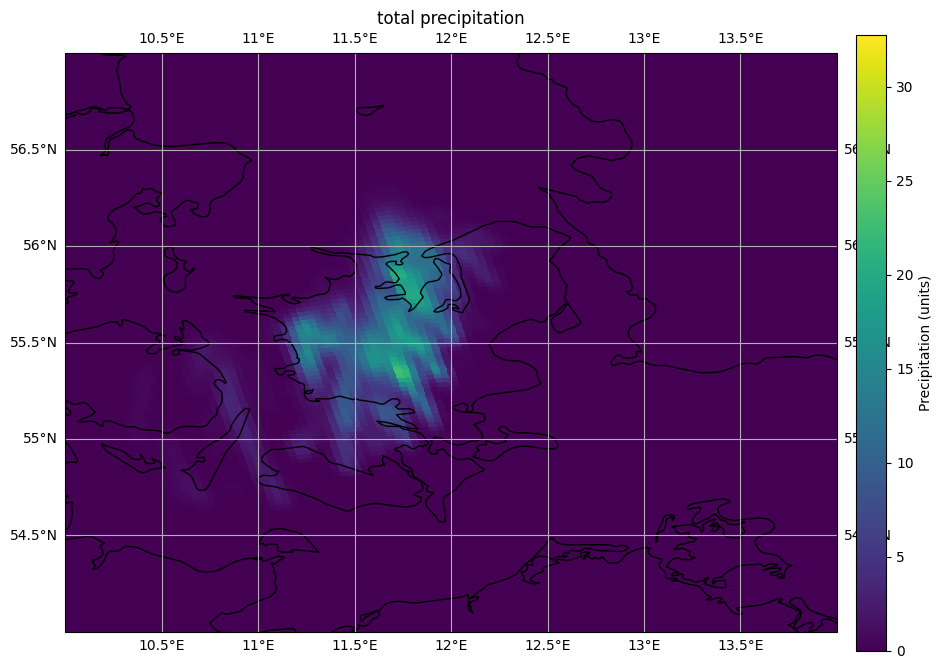

In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs

# Define a custom blue color scale similar to the image
colors = [
    '#e0f3f8',  # very light blue
    '#a9d6e5',
    '#74b9d8',
    '#3b8ec2',
    '#1a5e8a',  # deep blue
    '#0b3d66'
]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue', colors, N=256)
cmap = "viridis"
# Your dataset and variable
tp = df['tp']
lats = df['latitude']
lons = df['longitude']

pc = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': pc})

im = ax.pcolormesh(
    lons, lats, tp,
    transform=pc,
    cmap=cmap,
    shading='auto'
)

ax.coastlines()
ax.gridlines(draw_labels=True)
# Set the extent to zoom in on a specific region
# Format: [lon_min, lon_max, lat_min, lat_max]
lon_min = 10
lon_max = 14
lat_min = 54
lat_max = 57
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=pc)


# Add an X marker at the maximum value location
#ax.plot(max_lon, max_lat, 'Xr', markersize=12, markeredgewidth=2, transform=pc)

# Add a text annotation with the maximum value
#ax.text(max_lon, max_lat, f'Max: {max_value:.2f}', color='red',
#        fontweight='bold', transform=pc,
#        horizontalalignment='right', verticalalignment='bottom')

cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, label='Precipitation (units)')

plt.title('total precipitation')
plt.show()

In [28]:

# Define bounding box
lon_min, lon_max = 10, 14
lat_min, lat_max = 54, 57

# Create masks for the desired region
lat_mask = (df.latitude >= lat_min) & (df.latitude <= lat_max)
lon_mask = (df.longitude >= lon_min) & (df.longitude <= lon_max)
combined_mask = lat_mask & lon_mask

# Method 1: Using where (keeps original grid structure with NaN outside region)
#df_subset = df.where(combined_mask)

# Method 2: More memory efficient - extract only the bounding box indices
y_indices = np.where(np.any(combined_mask, axis=1))[0]
x_indices = np.where(np.any(combined_mask, axis=0))[0]

if len(y_indices) > 0 and len(x_indices) > 0:
    y_min, y_max = y_indices.min(), y_indices.max() + 1
    x_min, x_max = x_indices.min(), x_indices.max() + 1
    df_subset = df.isel(y=slice(y_min, y_max), x=slice(x_min, x_max))

# Save to NetCDF
output_file = "tp_subset_region.nc"
df_subset.to_netcdf(output_file)
print(f"Saved subset to {output_file}")

Saved subset to tp_subset_region.nc


In [29]:
df_sub = xr.open_dataset(output_file)

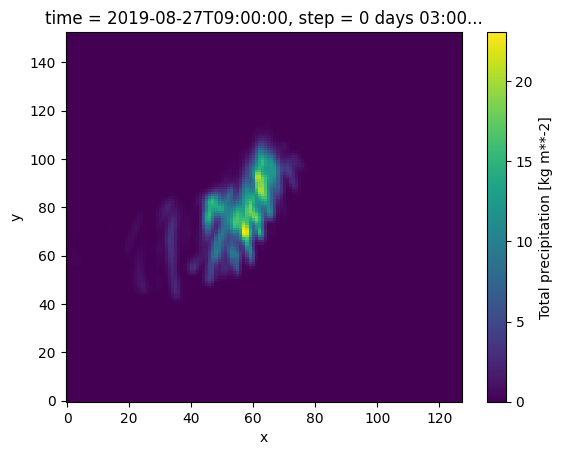

In [30]:
df_sub["tp"].plot()

In [48]:
# Print all global attributes (often contains projection info)
print("Global attributes:")
for k, v in df.attrs.items():
    print(f"{k}: {v}")

# Print all variable names (look for 'crs', 'spatial_ref', etc.)
print("\nVariable names:")
print(list(df.variables))

# If a 'crs' or 'spatial_ref' variable exists, print its attributes
for var in ['crs', 'spatial_ref']:
    if var in df.variables:
        print(f"\nAttributes of '{var}':")
        for k, v in df[var].attrs.items():
            print(f"{k}: {v}")

# Sometimes projection info is in the latitude/longitude variable attributes
if 'latitude' in df.variables:
    print("\nLatitude variable attributes:")
    for k, v in df['latitude'].attrs.items():
        print(f"{k}: {v}")
if 'longitude' in df.variables:
    print("\nLongitude variable attributes:")
    for k, v in df['longitude'].attrs.items():
        print(f"{k}: {v}")

Global attributes:
GRIB_edition: 1
GRIB_centre: ekmi
GRIB_centreDescription: Copenhagen
GRIB_subCentre: 255
Conventions: CF-1.7
institution: Copenhagen
history: 2025-07-22T10:54 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.42.0 with {"source": "sample_data/NEA/NEA19082700/tp_NEA1908270903.grib", "filter_by_keys": {}, "encode_cf": ["parameter", "time", "geography", "vertical"]}

Variable names:
['time', 'step', 'heightAboveGround', 'latitude', 'longitude', 'valid_time', 'tp']

Latitude variable attributes:
units: degrees_north
standard_name: latitude
long_name: latitude

Longitude variable attributes:
units: degrees_east
standard_name: longitude
long_name: longitude


In [43]:
# create simple synthetic fields


# Get grid size from your subset
ny, nx = df_subset.tp.shape

# Set background and blob values
background = 5.0
blob = 10.0

# Set blob size (about 1/5 of grid size, adjust as needed)
block_size = min(ny, nx) // 5

# X positions: left and right blobs
x_left = int(nx * 0.25) - block_size // 2
x_right = int(nx * 0.75) - block_size // 2

# Y positions:
#   - Analysis: upper half
#   - Forecast: lower half
y_analysis = int(ny * 0.25) - block_size // 2
y_forecast = int(ny * 0.75) - block_size // 2

# Create fields
analysis = np.full((ny, nx), background, dtype=float)
forecast = np.full((ny, nx), background, dtype=float)

# Place blobs in analysis (upper half)
analysis[y_analysis:y_analysis+block_size, x_left:x_left+block_size] = blob
analysis[y_analysis:y_analysis+block_size, x_right:x_right+block_size] = blob

# Place blobs in forecast (lower half)
forecast[y_forecast:y_forecast+block_size, x_left:x_left+block_size] = blob
forecast[y_forecast:y_forecast+block_size, x_right:x_right+block_size] = blob

# Wrap in xarray Dataset with real coordinates
ds_synth = xr.Dataset(
    {
        "tp_analysis": (("y", "x"), forecast), #inverted here to match Bents Fig 7
        "tp_forecast": (("y", "x"), analysis),
    },
    coords={
        "latitude": df_subset.latitude,
        "longitude": df_subset.longitude,
        "time": df_subset.time,
        "step": df_subset.step,
    }
)
ds_synth.attrs = df_subset.attrs.copy()





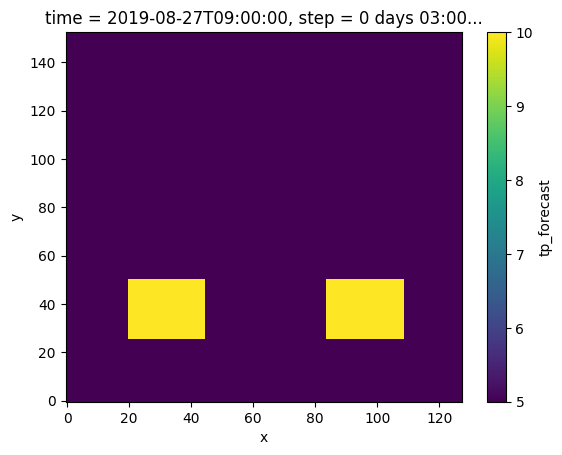

In [44]:
ds_synth["tp_forecast"].plot()

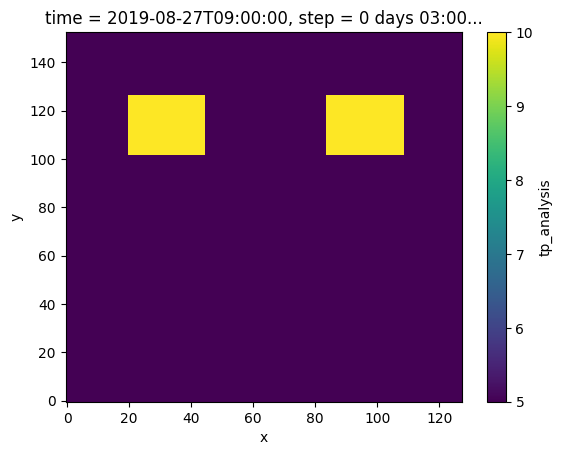

In [45]:
ds_synth["tp_analysis"].plot()

In [46]:
# Wrap in xarray Dataset with real coordinates
ds_synth = xr.Dataset(
    {
        "tp_analysis": (("y", "x"), forecast), #inverted here to match Bents Fig 7
        
    },
    coords={
        "latitude": df_subset.latitude,
        "longitude": df_subset.longitude,
        "time": df_subset.time,
        "step": df_subset.step,
    }
)
ds_synth.attrs = df_subset.attrs.copy()

ds_synth.to_netcdf("synthetic_tp_analysis.nc")

In [53]:
# Wrap in xarray Dataset with real coordinates
ds_synth = xr.Dataset(
    {
        "tp_forecast": (("y", "x"), analysis), #inverted here to match Bents Fig 7
        
    },
    coords={
        "latitude": df_subset.latitude,
        "longitude": df_subset.longitude
        #"time": df_subset.time,
        #"step": df_subset.step,
    }
)
ds_synth.attrs = df_subset.attrs.copy()


# Add the RotatedLatLon_Projection variable
# I could see this information in Panoply but not from xarray above, strange...
ds_synth["RotatedLatLon_Projection"] = xr.DataArray(
    0,  # dummy value, as per CF conventions for grid mapping variables
    attrs={
        "grid_mapping_name": "rotated_latlon",
        "grid_south_pole_latitude": -40.0,
        "grid_south_pole_longitude": 26.500001907348633,
        "grid_south_pole_angle": 0.0,
    }
)

# Link the grid mapping to your data variables
ds_synth["tp_forecast"].attrs["grid_mapping"] = "RotatedLatLon_Projection"

# Save to NetCDF
ds_synth.to_netcdf("synthetic_tp_forecast.nc")